# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
dataset = pd.read_csv('real_estate_price_size.csv')
dataset.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,100.0,292289.47016,77051.727525,154282.128,234280.148,280590.716,335723.6960,500681.128
size,100.0,853.02420,297.941951,479.750,643.330,696.405,1029.3225,1842.510


## Target Variable

The target variable in this regression analysis is the `price`, while the independent variable is the `size`

## Create the regression

### Declare the dependent and the independent variables

In [11]:
x = dataset['size']
y = dataset['price']

x1_sm = dataset['size']
y_sm = dataset['price']

### Plotting the data

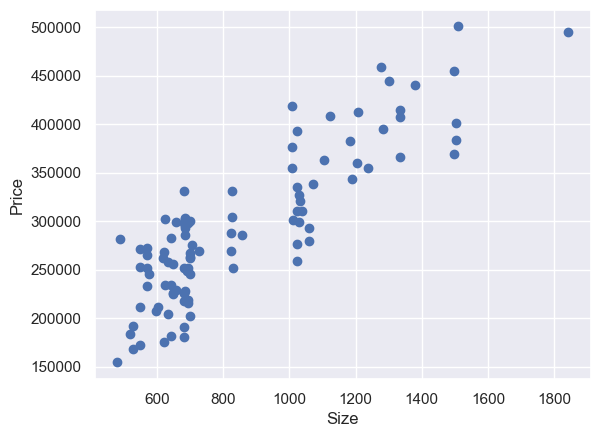

In [6]:
plt.scatter(x, y)
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

### Transform the inputs into a matrix (2D object)

In [8]:
x_matrix = x.values.reshape(-1, 1)
x_matrix.shape

(100, 1)

### Regression itself

In [10]:
model = LinearRegression()
model.fit(x_matrix, y)

LinearRegression()

### Coefficient

In [13]:
model.coef_

array([223.17874259])

### Intercept

In [14]:
model.intercept_

101912.60180122912

### OLS

In [12]:
x_sm = sm.add_constant(x1_sm)
ols_result = sm.OLS(y_sm, x_sm).fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           8.13e-31
Time:                        15:00:11   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculate the R-squared

In [15]:
model.score(x_matrix, y)

0.7447391865847587

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [16]:
new_data = pd.DataFrame(data=[750, 800], columns=['size'])
new_data

,size
0,750
1,800


In [17]:
model.predict(new_data)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([269296.65874718, 280455.59587692])

In [18]:
combined = new_data.join(pd.DataFrame({'prediction': model.predict(new_data)}))
combined

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,size,prediction
0,750,269296.658747
1,800,280455.595877


## Plotting The Data

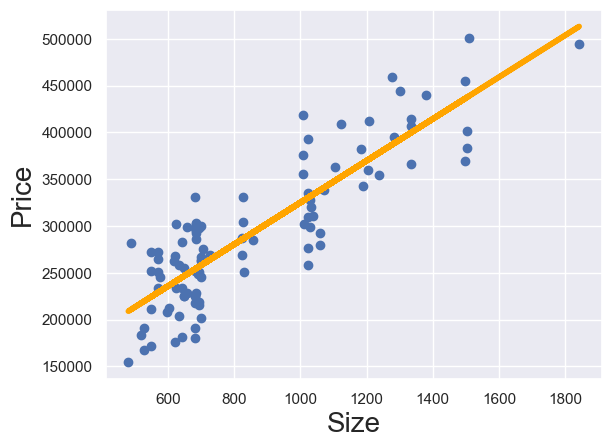

<Figure size 640x480 with 0 Axes>

In [20]:
plt.scatter(x, y)
yhat = 101912.60180122912 + 223.17874259 * x
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()
plt.savefig('Simple Linear Regression Result using sklearn.png')